


#CONTENT

This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from the Canada Government's official open data website. This is a compiled version. This contains data over a period of 7 years.

There is a total of 26075 rows and 15 columns. There are a few abbreviations that have been used to describe the features. I am listing them out here. The same can be found in the Data Description sheet.

##Model

4WD/4X4 = Four-wheel drive

AWD = All-wheel drive

FFV = Flexible-fuel vehicle

SWB = Short wheelbase

LWB = Long wheelbase

EWB = Extended wheelbase

##Transmission

A = Automatic

AM = Automated manual

AS = Automatic with select shift

AV = Continuously variable

M = Manual

3 - 10 = Number of gears

##Fuel type

X = Regular gasoline

Z = Premium gasoline

D = Diesel

E = Ethanol (E85)

N = Natural gas

##Fuel Consumption

City and highway fuel consumption ratings are shown in liters per 100 kilometers (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

##CO2 Emissions

The tailpipe emissions of carbon dioxide (in grams per kilometer) for combined city and highway driving

##Smog Rating

The tailpipe emissions of smog-forming pollutants are rated on a scale from 1 (worst) to 10 (best)

##ACKNOWLEDGEMENTS

The data has been taken and compiled from the below Canada Government official link -
"https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6"

#QUESTIONS

Determine or test the influence of different variables on the emission of CO2 and the smog ratings.

What are the influencing features that affect CO2 emission and smog ratings the most?

Will there be any difference in the CO2 emissions when Fuel Consumption for City and Highway is considered separately and when their weighted variable interaction is considered?

DATASET: https://www.kaggle.com/datasets/abhikdas2809/canadacaremissions/download?datasetVersionNumber=3


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler



In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab/Case Exams/CanadaCarEmissions.xlsx')
df

,MODEL YEAR,MAKE,MODEL(# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,11.6,8.3,10.1,28.0,232.0,NaN,NaN
2,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,11.0,8.3,9.8,29.0,225.0,NaN,NaN
3,1995.0,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,10.8,8.3,9.7,29.0,223.0,NaN,NaN
4,1995.0,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,14.2,10.5,12.5,23.0,288.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26071,2022.0,Volvo,XC40 T5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.7,7.7,9.4,30.0,219.0,5.0,5.0
26072,2022.0,Volvo,XC60 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.5,8.1,9.4,30.0,219.0,5.0,5.0
26073,2022.0,Volvo,XC60 B6 AWD,SUV: Small,2.0,4.0,AS8,Z,11.0,8.7,9.9,29.0,232.0,5.0,7.0
26074,2022.0,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4.0,AS8,Z,11.5,8.4,10.1,28.0,236.0,5.0,5.0


## Data PreProcessing

In [ ]:
df.isnull().sum()

MODEL YEAR                           1
MAKE                                 1
MODEL(# = high output engine)        1
VEHICLE CLASS                        1
ENGINE SIZE (L)                      1
CYLINDERS                            1
TRANSMISSION                         1
FUEL TYPE                            1
FUEL CONSUMPTION CITY (L/100)        1
FUEL CONSUMPTION HWY (L/100)         1
COMB (L/100 km)                      1
COMB (mpg)                           1
CO2 EMISSIONS (g/km)                 1
CO2 Rating                       18905
Smog Rating                      20015
dtype: int64

###Total Percentage of Null Values from Dataset

In [ ]:
df.isnull().sum()/df.shape[0]*100

MODEL YEAR                        0.003835
MAKE                              0.003835
MODEL(# = high output engine)     0.003835
VEHICLE CLASS                     0.003835
ENGINE SIZE (L)                   0.003835
CYLINDERS                         0.003835
TRANSMISSION                      0.003835
FUEL TYPE                         0.003835
FUEL CONSUMPTION CITY (L/100)     0.003835
FUEL CONSUMPTION HWY (L/100)      0.003835
COMB (L/100 km)                   0.003835
COMB (mpg)                        0.003835
CO2 EMISSIONS (g/km)              0.003835
CO2 Rating                       72.499617
Smog Rating                      76.756404
dtype: float64

In [ ]:
df = df.drop([0],axis = 0)
df

,MODEL YEAR,MAKE,MODEL(# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
1,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,11.6,8.3,10.1,28.0,232.0,NaN,NaN
2,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,11.0,8.3,9.8,29.0,225.0,NaN,NaN
3,1995.0,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,10.8,8.3,9.7,29.0,223.0,NaN,NaN
4,1995.0,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,14.2,10.5,12.5,23.0,288.0,NaN,NaN
5,1995.0,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Z,14.6,11.0,13.0,22.0,299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26071,2022.0,Volvo,XC40 T5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.7,7.7,9.4,30.0,219.0,5.0,5.0
26072,2022.0,Volvo,XC60 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.5,8.1,9.4,30.0,219.0,5.0,5.0
26073,2022.0,Volvo,XC60 B6 AWD,SUV: Small,2.0,4.0,AS8,Z,11.0,8.7,9.9,29.0,232.0,5.0,7.0
26074,2022.0,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4.0,AS8,Z,11.5,8.4,10.1,28.0,236.0,5.0,5.0


In [ ]:
df_med =  df.fillna(df.median())
df_med

,MODEL YEAR,MAKE,MODEL(# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
1,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,11.6,8.3,10.1,28.0,232.0,5.0,5.0
2,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,11.0,8.3,9.8,29.0,225.0,5.0,5.0
3,1995.0,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,10.8,8.3,9.7,29.0,223.0,5.0,5.0
4,1995.0,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,14.2,10.5,12.5,23.0,288.0,5.0,5.0
5,1995.0,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Z,14.6,11.0,13.0,22.0,299.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26071,2022.0,Volvo,XC40 T5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.7,7.7,9.4,30.0,219.0,5.0,5.0
26072,2022.0,Volvo,XC60 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.5,8.1,9.4,30.0,219.0,5.0,5.0
26073,2022.0,Volvo,XC60 B6 AWD,SUV: Small,2.0,4.0,AS8,Z,11.0,8.7,9.9,29.0,232.0,5.0,7.0
26074,2022.0,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4.0,AS8,Z,11.5,8.4,10.1,28.0,236.0,5.0,5.0


In [ ]:
df_mean = df.fillna(df.mean())
df_mean

,MODEL YEAR,MAKE,MODEL(# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
1,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,11.6,8.3,10.1,28.0,232.0,4.65988,4.674311
2,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,11.0,8.3,9.8,29.0,225.0,4.65988,4.674311
3,1995.0,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,10.8,8.3,9.7,29.0,223.0,4.65988,4.674311
4,1995.0,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,14.2,10.5,12.5,23.0,288.0,4.65988,4.674311
5,1995.0,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Z,14.6,11.0,13.0,22.0,299.0,4.65988,4.674311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26071,2022.0,Volvo,XC40 T5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.7,7.7,9.4,30.0,219.0,5.00000,5.000000
26072,2022.0,Volvo,XC60 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.5,8.1,9.4,30.0,219.0,5.00000,5.000000
26073,2022.0,Volvo,XC60 B6 AWD,SUV: Small,2.0,4.0,AS8,Z,11.0,8.7,9.9,29.0,232.0,5.00000,7.000000
26074,2022.0,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4.0,AS8,Z,11.5,8.4,10.1,28.0,236.0,5.00000,5.000000


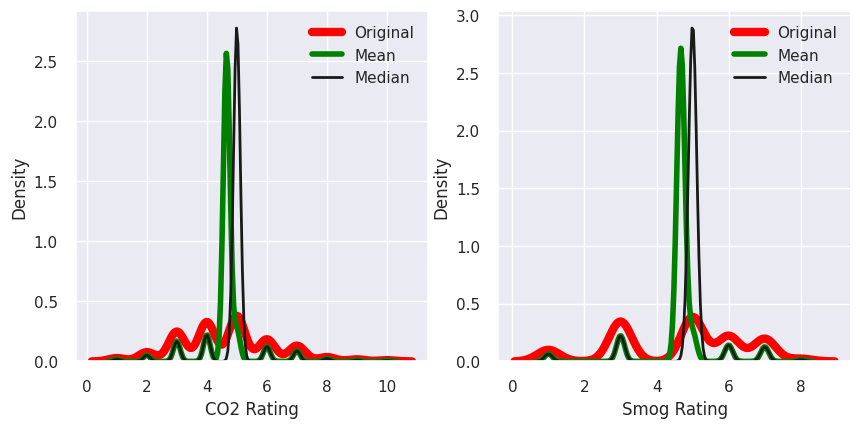

In [ ]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(['CO2 Rating','Smog Rating']):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var], bins=20,hist=False, kde_kws={'linewidth':6, 'color':'red'}, label="Original",)
    sns.distplot(df_mean[var], bins=20,hist=False, kde_kws={'linewidth':4, 'color':'green'},label="Mean",)
    sns.distplot(df_med[var], bins=20,hist=False, kde_kws={'linewidth':2, 'color':'k'},label="Median",)
    plt.legend()

In [ ]:
df_med.columns

Index(['MODEL YEAR', 'MAKE', 'MODEL(# = high output engine)', 'VEHICLE CLASS',
       'ENGINE SIZE (L)', 'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE',
       'FUEL CONSUMPTION CITY (L/100)', 'FUEL CONSUMPTION HWY (L/100)',
       'COMB (L/100 km)', 'COMB (mpg)', 'CO2 EMISSIONS (g/km)', 'CO2 Rating',
       'Smog Rating'],
      dtype='object')

In [ ]:
df_med['VEHICLE CLASS'].value_counts()

COMPACT                     3207
SUV                         3036
MID-SIZE                    2715
PICKUP TRUCK - STANDARD     2278
SUBCOMPACT                  2066
FULL-SIZE                   1256
TWO-SEATER                  1106
SUV: Small                   929
MINICOMPACT                  858
SUV - SMALL                  827
STATION WAGON - SMALL        810
Mid-size                     660
SUV: Standard                608
MINIVAN                      556
Pickup truck: Standard       515
SUV - STANDARD               514
Compact                      491
PICKUP TRUCK - SMALL         470
VAN - CARGO                  469
STATION WAGON - MID-SIZE     466
Subcompact                   451
Full-size                    417
VAN - PASSENGER              386
Two-seater                   313
Minicompact                  211
Station wagon: Small         140
Pickup truck: Small          108
Special purpose vehicle       62
SPECIAL PURPOSE VEHICLE       52
Station wagon: Mid-size       44
Minivan   

In [ ]:
def rep2(x,y):
    df_med['FUEL TYPE'].replace(x,y,inplace=True)

rep2('X','Regular gasoline')

rep2('Z','Premium gasoline')

rep2('D' ,'Diesel')

rep2('E','Ethanol (E85)')

rep2('N','Natural gas')

## Replacing repeated case sensitive values
###Coverting all repeated lowercase and uppercase values to uppercase





In [ ]:
def rep(x,y):
    df_med['VEHICLE CLASS'].replace(x,y,inplace=True)


rep('Compact','COMPACT')
rep('SUV: Small','SUV - SMALL')
rep('Two-seater','TWO-SEATER')
rep('Mid-size','MID-SIZE')
rep('Minicompact','MINICOMPACT')
rep('Subcompact','SUBCOMPACT')
rep('Station wagon: Small','STATION WAGON - SMALL')
rep('Full-size','FULL-SIZE')
rep('SUV: Standard','SUV - STANDARD')
rep('Special purpose vehicle','SPECIAL PURPOSE VEHICLE')
rep('Pickup truck: Small','PICKUP TRUCK - SMALL')
rep('Pickup truck: Standard','PICKUP TRUCK - STANDARD')
rep('Minivan','MINIVAN')
rep('Van: Passenger','VAN - PASSENGER')
rep('Station wagon: Mid-size','STATION WAGON: MID-SIZE')

In [ ]:
df_med['MAKE'].unique()

array(['ACURA', 'ALFA ROMEO', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'EAGLE', 'FERRARI',
       'FORD', 'GEO', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'ISUZU',
       'JAGUAR', 'JEEP', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA',
       'MERCEDES-BENZ', 'MERCURY', 'NISSAN', 'OLDSMOBILE', 'PLYMOUTH',
       'PONTIAC', 'PORSCHE', 'ROLLS-ROYCE', 'SAAB', 'SATURN', 'SUBARU',
       'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'DAEWOO', 'KIA',
       'MASERATI', 'MINI', 'MITSUBISHI', 'SMART', 'HUMMER',
       'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI', 'SCION', 'FIAT', 'RAM',
       'SRT', 'GENESIS', 'Acura', 'Alfa Romeo', 'Aston Martin', 'Audi',
       'Bentley', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler',
       'Dodge', 'Ford', 'Genesis', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lincoln', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Mitsubishi',
       'Nissan', 'Porsche',

In [ ]:
def rep1(x,y):
    df_med['MAKE'].replace(x,y,inplace=True)

In [ ]:
rep1('Acura','ACURA')
rep1('Alfa Romeo','ALFA ROMEO')
rep1('Audi','AUDI')
rep1('Bentley','BENTLEY')
rep1('Buick','BUICK')
rep1('Cadillac','CADILLAC')
rep1('Chevrolet','CHEVROLET')
rep1('Chrysler','CHRYSLER')
rep1('Dodge', 'DODGE')
rep1('Ford','FORD')
rep1('Genesis','GENESIS')
rep1('Honda','HONDA')
rep1('Hyundai','HYUNDAI')
rep1('Infiniti','INFINITI')

rep1('Jaguar','JAGUAR')
rep1('Jeep','JEEP')
rep1('Kia','KIA')
rep1('Lamborghini','LAMBORGHINI')
rep1('Land Rover','LAND ROVER')
rep1('Lexus','LEXUS')
rep1('Lincoln','LINCOLN')
rep1('Maserati','MASERATI')
rep1('Mazda','MAZDA')
rep1('Mercedes-Benz','MERCEDES-BENZ')
rep1('Mitsubishi','MITSUBISHI')
rep1('Nissan','NISSAN')
rep1('Porsche','PORSCHE')
rep1('Ram','RAM')
rep1('Rolls-Royce','ROLLS-ROYCE')
rep1('Subaru','SUBARU')
rep1('Toyota','TOYOTA')
rep1('Volkswagen','VOLKSWAGEN')
rep1('Volvo','VOLVO')

In [ ]:
def rep3(x,y):
    df_med['TRANSMISSION'].replace(x,y,inplace=True)
rep3('A','Automatic')

rep3('AM','Automated manual')

rep3('AS','Automatic with select shift')

rep3('AV','Continuously variable')

rep3('M','Manual')

rep3('3 - 10','Number of gears')

In [ ]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26075 entries, 1 to 26075
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MODEL YEAR                     26075 non-null  float64
 1   MAKE                           26075 non-null  object 
 2   MODEL(# = high output engine)  26075 non-null  object 
 3   VEHICLE CLASS                  26075 non-null  object 
 4   ENGINE SIZE (L)                26075 non-null  float64
 5   CYLINDERS                      26075 non-null  float64
 6   TRANSMISSION                   26075 non-null  object 
 7   FUEL TYPE                      26075 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100)  26075 non-null  float64
 9   FUEL CONSUMPTION HWY (L/100)   26075 non-null  float64
 10  COMB (L/100 km)                26075 non-null  float64
 11  COMB (mpg)                     26075 non-null  float64
 12  CO2 EMISSIONS (g/km)           26075 non-null 

In [ ]:
df_med.describe()

,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
count,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000
mean,2009.576031,3.355448,5.844257,13.036272,9.162991,11.294082,26.784314,256.679003,4.906462,4.924295
std,7.725814,1.342021,1.796767,3.560212,2.398400,2.997495,7.306594,63.062087,0.872277,0.874422
min,1995.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000,1.000000,1.000000
25%,2004.000000,2.300000,4.000000,10.600000,7.500000,9.200000,22.000000,212.500000,5.000000,5.000000
50%,2010.000000,3.000000,6.000000,12.600000,8.700000,10.800000,26.000000,248.000000,5.000000,5.000000
75%,2016.000000,4.200000,8.000000,15.100000,10.500000,13.000000,31.000000,297.000000,5.000000,5.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000,10.000000,8.000000


In [ ]:
cor = df_med.corr()
cor

,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
MODEL YEAR,1.000000,-0.053910,-0.042903,-0.194822,-0.173235,-0.189731,0.190047,-0.205244,-0.147843,-0.117413
ENGINE SIZE (L),-0.053910,1.000000,0.909944,0.811895,0.731357,0.793929,-0.740352,0.798527,-0.385670,-0.174829
CYLINDERS,-0.042903,0.909944,1.000000,0.779594,0.672476,0.751520,-0.698615,0.766113,-0.396544,-0.196004
FUEL CONSUMPTION CITY (L/100),-0.194822,0.811895,0.779594,1.000000,0.942622,0.992679,-0.923624,0.927856,-0.418855,-0.181680
FUEL CONSUMPTION HWY (L/100),-0.173235,0.731357,0.672476,0.942622,1.000000,0.975750,-0.885986,0.914104,-0.395124,-0.158393
COMB (L/100 km),-0.189731,0.793929,0.751520,0.992679,0.975750,1.000000,-0.922613,0.935492,-0.415993,-0.175801
COMB (mpg),0.190047,-0.740352,-0.698615,-0.923624,-0.885986,-0.922613,1.000000,-0.900366,0.471063,0.189103
CO2 EMISSIONS (g/km),-0.205244,0.798527,0.766113,0.927856,0.914104,0.935492,-0.900366,1.000000,-0.458441,-0.200077
CO2 Rating,-0.147843,-0.385670,-0.396544,-0.418855,-0.395124,-0.415993,0.471063,-0.458441,1.000000,0.434861
Smog Rating,-0.117413,-0.174829,-0.196004,-0.181680,-0.158393,-0.175801,0.189103,-0.200077,0.434861,1.000000


##Determine or test the influence of different variables on the emission of CO2 and the smog ratings.

#Features Selection

### Selection of Features on basis of Multivariate Pearson correlation

<Axes: >

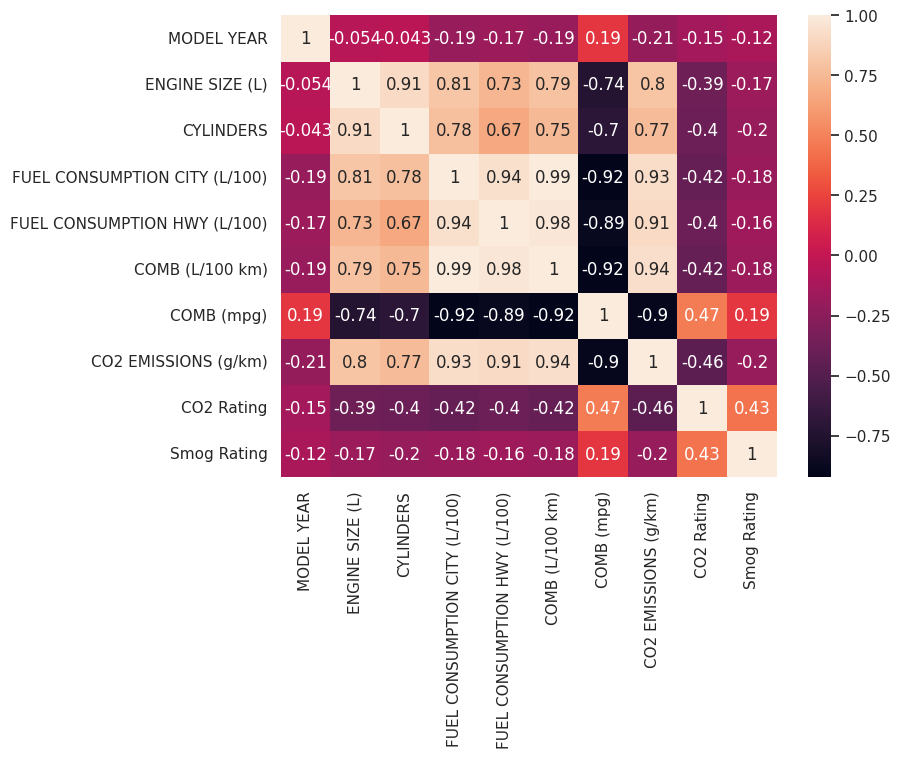

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cor,annot=True)

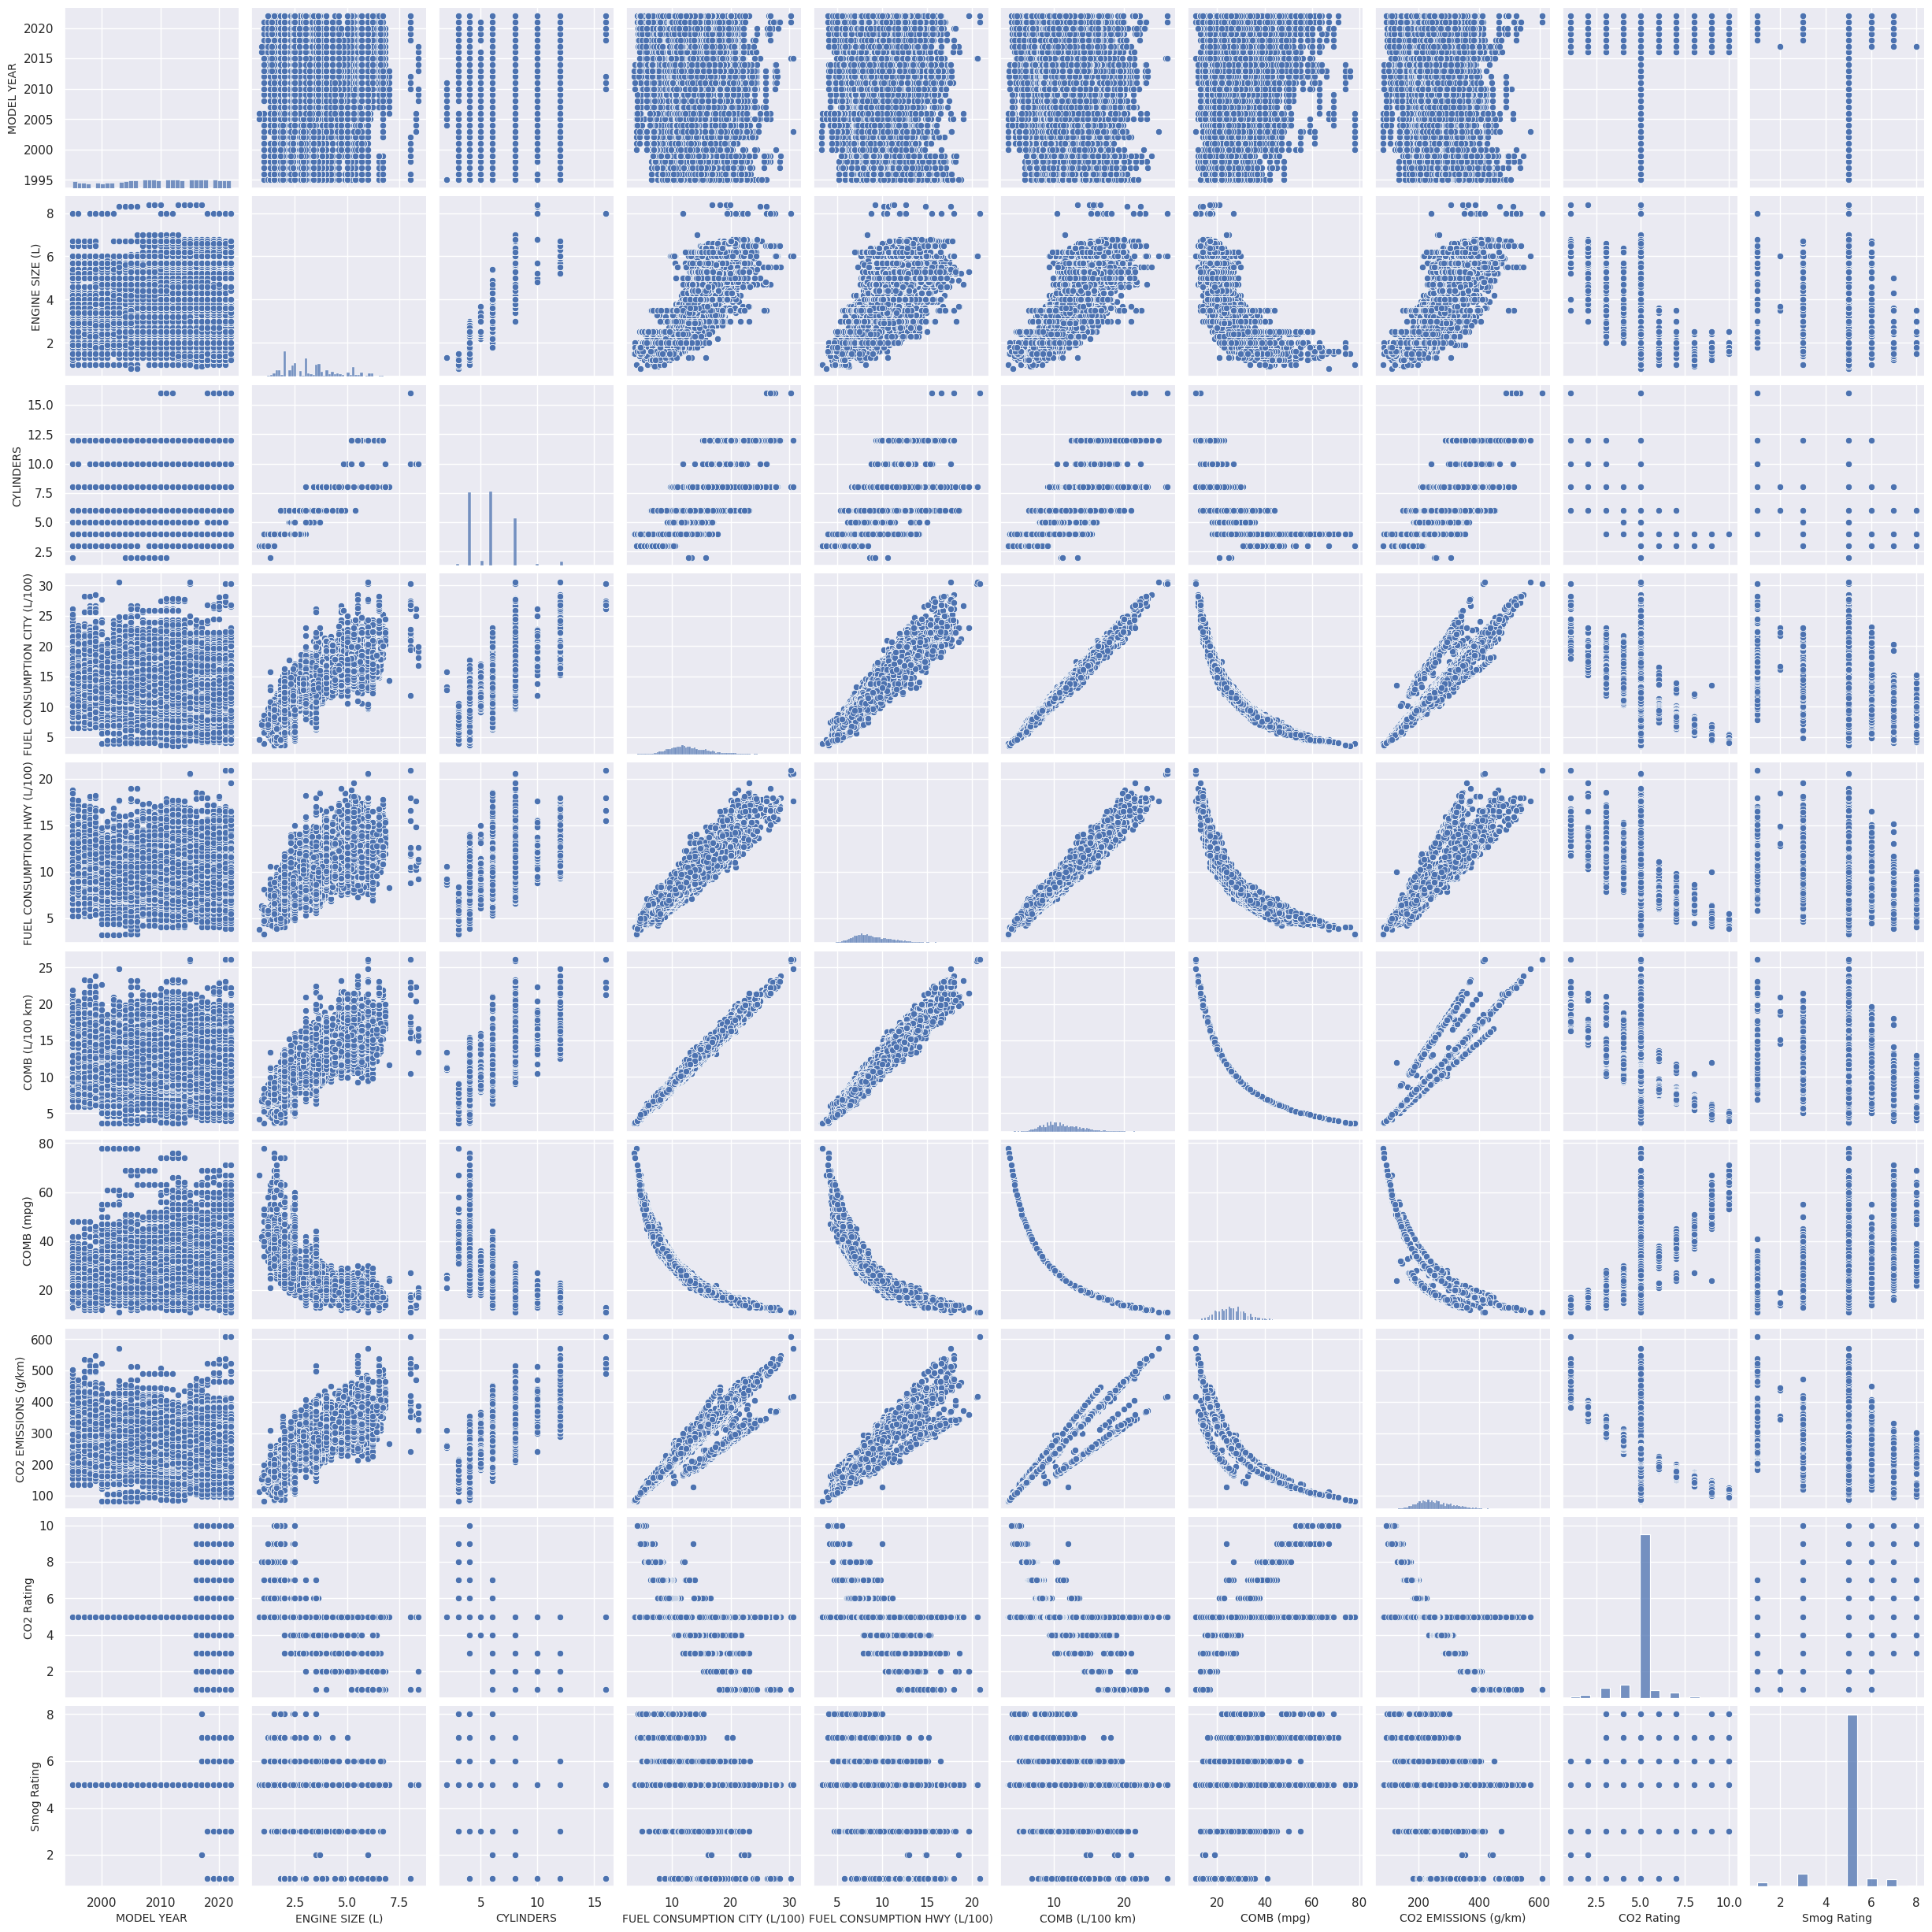

In [ ]:

sns.set_context(rc = {'axes.labelsize':10})
sns.pairplot(data = df_med)
plt.show()

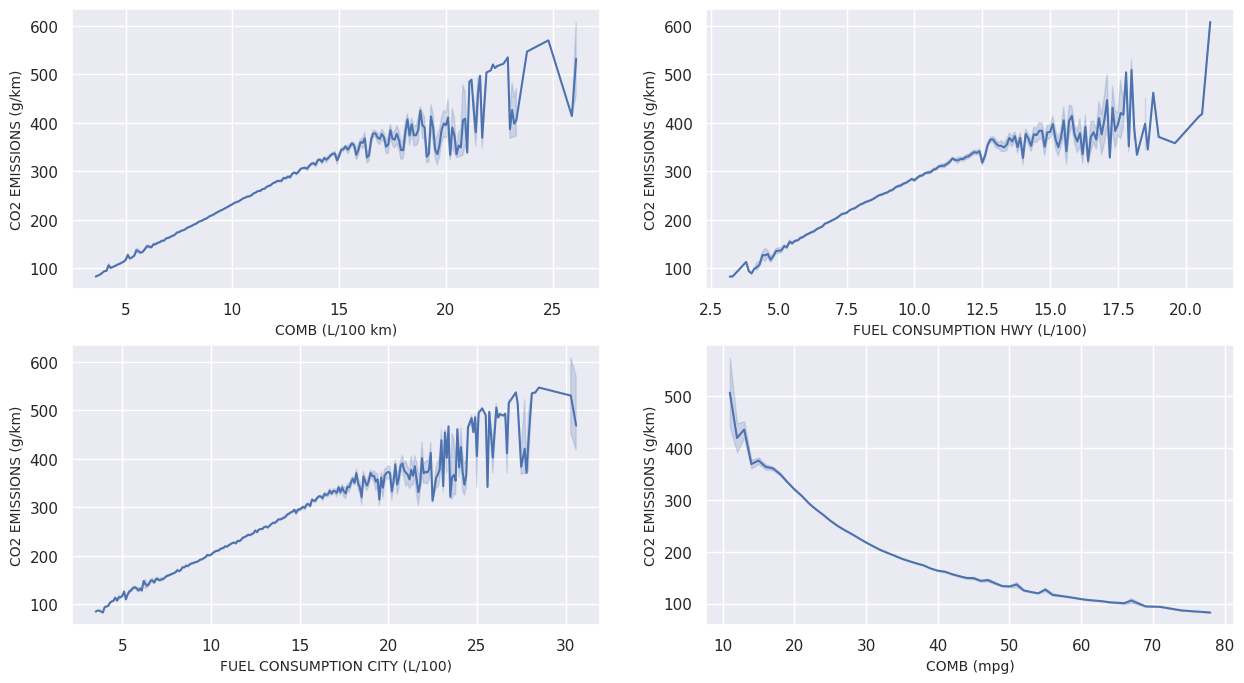

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.lineplot(data = df_med,x = 'COMB (L/100 km)',y='CO2 EMISSIONS (g/km)')
plt.subplot(2,2,2)
sns.lineplot(data = df_med,x = 'FUEL CONSUMPTION HWY (L/100)',y='CO2 EMISSIONS (g/km)')
plt.subplot(2,2,3)
sns.lineplot(data = df_med,x = 'FUEL CONSUMPTION CITY (L/100)',y='CO2 EMISSIONS (g/km)')
plt.subplot(2,2,4)
sns.lineplot(data = df_med,x = 'COMB (mpg)',y='CO2 EMISSIONS (g/km)')

plt.show()


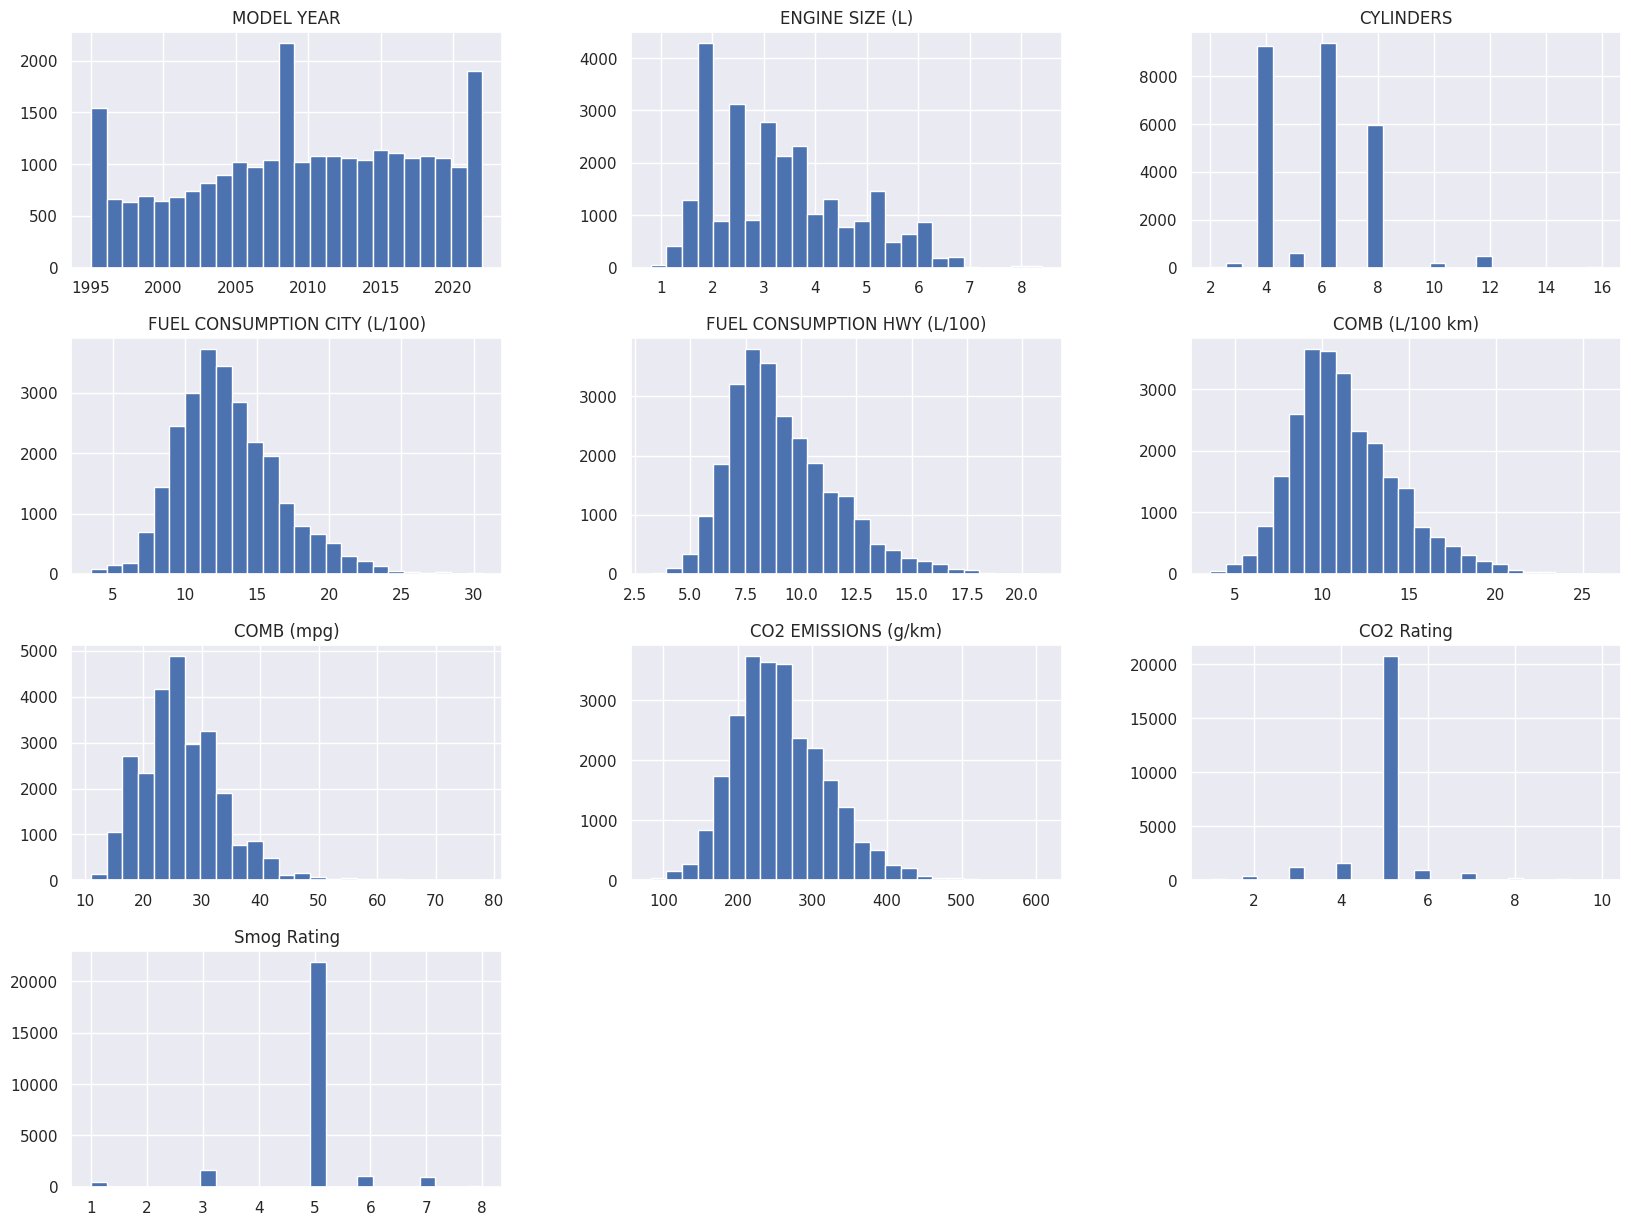

In [ ]:
df_med.hist(bins=25, figsize=(20,15))
plt.show()

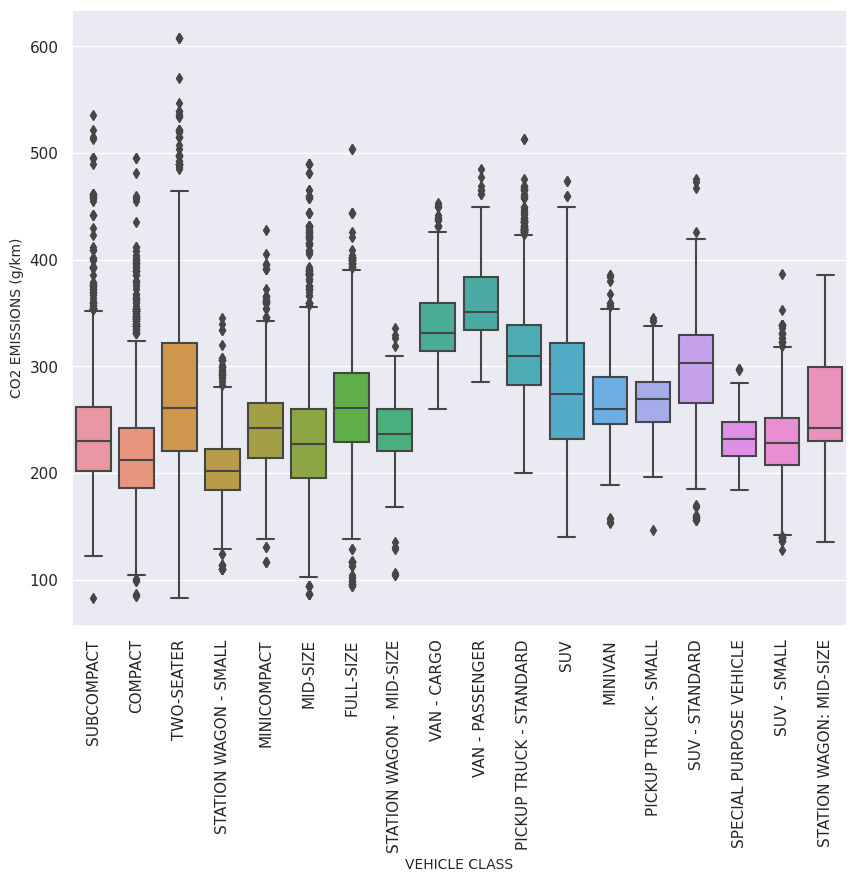

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(data = df_med, x = 'VEHICLE CLASS', y = 'CO2 EMISSIONS (g/km)')
plt.xticks(rotation = 90)
plt.show()

###Splitting the Columns into Numerical and Categorical, for feature selection and converting categorical features into numerical using get_dummies

In [ ]:
cat_vars = df_med.select_dtypes(include=["O"]).columns
cat_vars

Index(['MAKE', 'MODEL(# = high output engine)', 'VEHICLE CLASS',
       'TRANSMISSION', 'FUEL TYPE'],
      dtype='object')

In [ ]:
cat_vars_1 = ['TRANSMISSION','FUEL TYPE']

In [ ]:
df_med_cat = pd.get_dummies(df_med[cat_vars_1],drop_first=True)
df_med_cat

,TRANSMISSION_A3,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,...,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUEL TYPE_E,FUEL TYPE_N,FUEL TYPE_X,FUEL TYPE_Z
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26072,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
num_vars = df_med.select_dtypes(include=['int64','float64']).columns
num_vars

Index(['MODEL YEAR', 'ENGINE SIZE (L)', 'CYLINDERS',
       'FUEL CONSUMPTION CITY (L/100)', 'FUEL CONSUMPTION HWY (L/100)',
       'COMB (L/100 km)', 'COMB (mpg)', 'CO2 EMISSIONS (g/km)', 'CO2 Rating',
       'Smog Rating'],
      dtype='object')

#$L/100 Km = \frac {282.48}{Xmpg} $

In [ ]:
num_vars_1 = ['ENGINE SIZE (L)', 'CYLINDERS','FUEL CONSUMPTION CITY (L/100)', 'FUEL CONSUMPTION HWY (L/100)',
       'COMB (L/100 km)', 'CO2 EMISSIONS (g/km)', 'CO2 Rating',
       'Smog Rating']

In [ ]:
df_med_final = pd.concat([df_med[num_vars_1],df_med_cat],axis = 1)
df_med_final

,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating,TRANSMISSION_A3,TRANSMISSION_A4,...,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUEL TYPE_E,FUEL TYPE_N,FUEL TYPE_X,FUEL TYPE_Z
1,1.8,4.0,11.6,8.3,10.1,232.0,5.0,5.0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1.8,4.0,11.0,8.3,9.8,225.0,5.0,5.0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1.8,4.0,10.8,8.3,9.7,223.0,5.0,5.0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,3.2,6.0,14.2,10.5,12.5,288.0,5.0,5.0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,3.2,6.0,14.6,11.0,13.0,299.0,5.0,5.0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26071,2.0,4.0,10.7,7.7,9.4,219.0,5.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,1
26072,2.0,4.0,10.5,8.1,9.4,219.0,5.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,1
26073,2.0,4.0,11.0,8.7,9.9,232.0,5.0,7.0,0,0,...,0,0,0,0,0,0,0,0,0,1
26074,2.0,4.0,11.5,8.4,10.1,236.0,5.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Will there be any difference in the CO2 emissions when Fuel Consumption for City and Highway is considered separately and when their weighted variable interaction is considered?

##CO2 emissions when Fuel Consumption for City and Highway is considered COMBINED

In [ ]:
y = df_med_final['CO2 EMISSIONS (g/km)']
X = df_med_final.drop(['CO2 EMISSIONS (g/km)','Smog Rating','CO2 Rating','FUEL CONSUMPTION CITY (L/100)', 'FUEL CONSUMPTION HWY (L/100)'],axis = 1)

In [ ]:
y

1        232.0
2        225.0
3        223.0
4        288.0
5        299.0
         ...  
26071    219.0
26072    219.0
26073    232.0
26074    236.0
26075    252.0
Name: CO2 EMISSIONS (g/km), Length: 26075, dtype: float64

In [ ]:
X

,ENGINE SIZE (L),CYLINDERS,COMB (L/100 km),TRANSMISSION_A3,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,...,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUEL TYPE_E,FUEL TYPE_N,FUEL TYPE_X,FUEL TYPE_Z
1,1.8,4.0,10.1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.8,4.0,9.8,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1.8,4.0,9.7,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,3.2,6.0,12.5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3.2,6.0,13.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26071,2.0,4.0,9.4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26072,2.0,4.0,9.4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26073,2.0,4.0,9.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26074,2.0,4.0,10.1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [ ]:
from pycaret.regression import *

In [ ]:
setup(data=X,target= y)
best_model=compare_models()

,Description,Value
0,Session id,6590
1,Target,CO2 EMISSIONS (g/km)
2,Target type,Regression
3,Original data shape,"(26075, 37)"
4,Transformed data shape,"(26075, 37)"
5,Transformed train set shape,"(18252, 37)"
6,Transformed test set shape,"(7823, 37)"
7,Numeric features,36
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,1.1030,3.9385,1.9698,0.9990,0.0079,0.0045,3.3710
lightgbm,Light Gradient Boosting Machine,1.2873,6.0870,2.4570,0.9985,0.0097,0.0052,0.4230
et,Extra Trees Regressor,0.8060,5.7332,2.3704,0.9985,0.0095,0.0033,4.5760
rf,Random Forest Regressor,1.0079,8.6670,2.9137,0.9978,0.0117,0.0041,4.3310
dt,Decision Tree Regressor,0.8670,10.0819,3.1340,0.9974,0.0124,0.0035,0.1510
gbr,Gradient Boosting Regressor,2.2593,13.7510,3.6999,0.9965,0.0144,0.0090,1.7830
knn,K Neighbors Regressor,2.0390,19.4603,4.3930,0.9951,0.0176,0.0082,0.4750
ridge,Ridge Regression,2.0980,22.1565,4.7026,0.9944,0.0205,0.0085,0.1000
br,Bayesian Ridge,2.0748,22.0983,4.6964,0.9944,0.0207,0.0085,0.1530
lr,Linear Regression,2.0744,22.0983,4.6964,0.9944,0.0207,0.0085,0.4950


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from math import sqrt



model_lr = LinearRegression()
model_la = Lasso()
model_lri = Ridge()
model_le = ElasticNet()
model_rf = RandomForestRegressor()
model_gbr = GradientBoostingRegressor()
model_dtr = DecisionTreeRegressor()
model_xgb = XGBRegressor()
model_ada = AdaBoostRegressor()

models = {'Linear Regression':model_lr,'Lasso':model_la,'Ridge':model_lri,'Elastic Net':model_le,'Random Forest Regression': model_rf, 'Gradient Boosting Regressor':model_gbr,
          'Decision Tree Regressor': model_dtr,'XGBRegressor':model_xgb,'AdaRegrssor':model_ada}

for i in models.keys():
  print(i)
  models[i].fit(X_train, y_train)
  y_pred = models[i].predict(X_test)
  print("Accuracy in training dataset: ", (models[i].score(X_train, y_train)*100))
  print("Accuracy in testing dataset: ", models[i].score(X_test, y_test)*100)
  print("RMSE value: ", sqrt(mean_squared_error(y_test, y_pred)))
  print('--------------------------------------')

Linear Regression
Accuracy in training dataset:  99.44821599284019
Accuracy in testing dataset:  99.39152252963095
RMSE value:  4.934175620256603
--------------------------------------
Lasso
Accuracy in training dataset:  97.90477808813074
Accuracy in testing dataset:  97.97347591924816
RMSE value:  9.004679011337448
--------------------------------------
Ridge
Accuracy in training dataset:  99.44734681839994
Accuracy in testing dataset:  99.39077497663969
RMSE value:  4.937205663037753
--------------------------------------
Elastic Net
Accuracy in training dataset:  89.4582191354062
Accuracy in testing dataset:  89.50064654443825
RMSE value:  20.496213201862258
--------------------------------------
Random Forest Regression
Accuracy in training dataset:  99.95659158769021
Accuracy in testing dataset:  99.85200339390762
RMSE value:  2.43342648138008
--------------------------------------
Gradient Boosting Regressor
Accuracy in training dataset:  99.68193547690487
Accuracy in testing da

In [ ]:
y_pred=model_dtr.predict(X_test) #combine fuel consumption

ValueError: ignored

##CO2 emissions when Fuel Consumption for City and Highway is considered separately

In [ ]:
X_hwy = df_med_final.drop(['CO2 EMISSIONS (g/km)','FUEL CONSUMPTION CITY (L/100)','COMB (L/100 km)','CO2 Rating','Smog Rating'],axis =1)
X_cty = df_med_final.drop(['CO2 EMISSIONS (g/km)','FUEL CONSUMPTION HWY (L/100)','COMB (L/100 km)','CO2 Rating','Smog Rating'],axis = 1)


In [ ]:
X_hwy.head()

,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION HWY (L/100),TRANSMISSION_A3,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,...,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUEL TYPE_E,FUEL TYPE_N,FUEL TYPE_X,FUEL TYPE_Z
1,1.8,4.0,8.3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.8,4.0,8.3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1.8,4.0,8.3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,3.2,6.0,10.5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3.2,6.0,11.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_cty.head()

,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY (L/100),TRANSMISSION_A3,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,...,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUEL TYPE_E,FUEL TYPE_N,FUEL TYPE_X,FUEL TYPE_Z
1,1.8,4.0,11.6,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.8,4.0,11.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1.8,4.0,10.8,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,3.2,6.0,14.2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3.2,6.0,14.6,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y.head()

1    232.0
2    225.0
3    223.0
4    288.0
5    299.0
Name: CO2 EMISSIONS (g/km), dtype: float64

##Highway

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_hwy, y, test_size = 0.2, random_state = 48)

In [ ]:
for i in models.keys():
  print(i)
  models[i].fit(X_train1, y_train1)
  y_pred1 = models[i].predict(X_test1)
  print("Accuracy in training dataset: ", (models[i].score(X_train1, y_train1)*100))
  print("Accuracy in testing dataset: ", models[i].score(X_test1, y_test1)*100)
  print("RMSE value: ", sqrt(mean_squared_error(y_test1, y_pred1)))
  print('--------------------------------------')

Linear Regression
Accuracy in training dataset:  96.88061342797538
Accuracy in testing dataset:  96.99309411743965
RMSE value:  10.854155686492865
--------------------------------------
Lasso
Accuracy in training dataset:  95.0713538603429
Accuracy in testing dataset:  95.09271768403659
RMSE value:  13.866174172803802
--------------------------------------
Ridge
Accuracy in training dataset:  96.87959911224738
Accuracy in testing dataset:  96.99103198407687
RMSE value:  10.857876933722356
--------------------------------------
Elastic Net
Accuracy in training dataset:  88.53655005665586
Accuracy in testing dataset:  88.41756564182599
RMSE value:  21.3027687532654
--------------------------------------
Random Forest Regression
Accuracy in training dataset:  99.58672799209958
Accuracy in testing dataset:  98.93296024601987
RMSE value:  6.465861968976125
--------------------------------------
Gradient Boosting Regressor
Accuracy in training dataset:  97.70778775647479
Accuracy in testing 

In [ ]:
y_pred1=model_dtr.predict(X_test1)

##City

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_cty, y, test_size = 0.2, random_state = 58)

In [ ]:
for i in models.keys():
  print(i)
  models[i].fit(X_train2, y_train2)
  y_pred2 = models[i].predict(X_test2)
  print("Accuracy in training dataset: ", (models[i].score(X_train2, y_train2)*100))
  print("Accuracy in testing dataset: ", models[i].score(X_test2, y_test2)*100)
  print("RMSE value: ", sqrt(mean_squared_error(y_test2, y_pred2)))
  print('--------------------------------------')

Linear Regression
Accuracy in training dataset:  98.1357012409867
Accuracy in testing dataset:  98.08074986268741
RMSE value:  8.743921840293176
--------------------------------------
Lasso
Accuracy in training dataset:  96.17120260729916
Accuracy in testing dataset:  96.26055987847722
RMSE value:  12.20516818890267
--------------------------------------
Ridge
Accuracy in training dataset:  98.13415004724274
Accuracy in testing dataset:  98.07999328751556
RMSE value:  8.74564511289114
--------------------------------------
Elastic Net
Accuracy in training dataset:  87.70435986085036
Accuracy in testing dataset:  88.58964556153477
RMSE value:  21.320139611320467
--------------------------------------
Random Forest Regression
Accuracy in training dataset:  99.74488591632598
Accuracy in testing dataset:  99.3523785272378
RMSE value:  5.079267630081792
--------------------------------------
Gradient Boosting Regressor
Accuracy in training dataset:  98.286886204126
Accuracy in testing datas

###Will there be any difference in the CO2 emissions when Fuel Consumption for City and Highway is considered separately and when their weighted variable interaction is considered?

In [ ]:
y_pred2=model_dtr.predict(X_test2) #Decision Tree Regressor
out=pd.DataFrame({'actual':y_test,'predicted_comb':y_pred,'predicted_Hwy':y_pred1, 'predicted_Cty':y_pred2})
out=df_med.copy().merge(out,left_index=True,right_index=True)
out[['actual','predicted_comb','predicted_Hwy','predicted_Cty']].sample(10)

,actual,predicted_comb,predicted_Hwy,predicted_Cty
23144,157.0,158.000000,355.500000,249.200000
24167,208.0,207.576923,309.000000,229.000000
16280,205.0,205.000000,244.000000,230.214286
506,294.0,294.000000,324.333333,264.000000
14480,182.0,186.250000,299.000000,229.000000
18911,196.0,194.000000,327.000000,229.000000
9032,237.0,237.000000,229.200000,236.000000
24722,195.0,195.000000,431.500000,194.076923
12391,308.0,308.000000,238.000000,202.076923
4117,196.0,196.000000,252.000000,148.000000


In [ ]:
out2 = out.copy()
out2['diff'] = np.where(out2['predicted_Hwy'] == out2['predicted_Cty'], 0, out2['predicted_Hwy'] - out2['predicted_Cty'])
out2['diff']

2       -189.125000
3         -1.500000
8        213.181818
9       -140.500000
12        37.000000
            ...    
26048    -88.500000
26049     27.666667
26050     10.000000
26055     43.166667
26072    -26.000000
Name: diff, Length: 5215, dtype: float64

In [ ]:
(out2['diff'] < 0).sum() #this show the negative difference between pred_hwy and pred_cty

2595

In [ ]:
(out2['diff'] >= 0).sum() #this show the positive difference between pred_hwy and pred_cty

2620

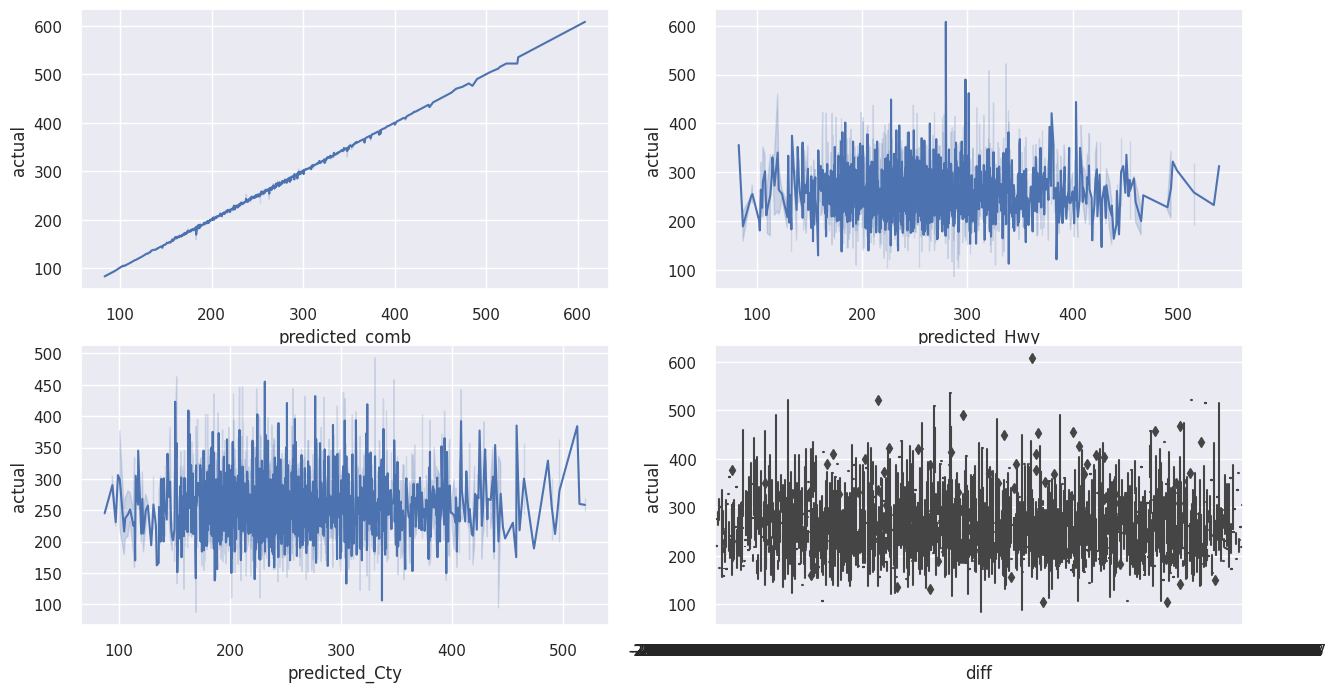

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.lineplot(data = out,x = 'predicted_comb',y='actual')
plt.subplot(2,2,2)
sns.lineplot(data = out,x = 'predicted_Hwy',y='actual')
plt.subplot(2,2,3)
sns.lineplot(data = out,x = 'predicted_Cty',y='actual')
plt.subplot(2,2,4)
sns.boxplot(data = out,x = 'diff',y='actual')

plt.show()

In [ ]:
import plotly.express as px

In [ ]:
fig=px.line(out.sort_values(by='predicted_comb'),
            x='predicted_comb',
            y = 'actual',
            animation_frame='FUEL TYPE',
            animation_group='predicted_comb',
            color='FUEL TYPE',
            markers=True,
            template='plotly_dark',
            #title='<b>Driver Age vs Delivery Time (Weatherwise)'
            )

fig.update_traces(showlegend=False)

In [ ]:
fig=px.line(out.sort_values(by='predicted_Hwy'),
            x='predicted_Hwy',
            y = 'actual',
            animation_frame='FUEL TYPE',
            animation_group='predicted_Hwy',
            color='FUEL TYPE',
            markers=True,
            template='plotly_dark',
            #title='<b>Driver Age vs Delivery Time (Weatherwise)'
            )

fig.update_traces(showlegend=False)

In [ ]:
fig=px.line(out.sort_values(by='predicted_Cty'),
            x='predicted_Cty',
            y = 'actual',
            animation_frame='FUEL TYPE',
            animation_group='predicted_Cty',
            color='FUEL TYPE',
            markers=True,
            template='plotly_dark',
            #title='<b>Driver Age vs Delivery Time (Weatherwise)'
            )

fig.update_traces(showlegend=False)

In [ ]:
fig=px.line(out.sort_values(by='predicted_Hwy'),
            x='predicted_Hwy',
            y = 'predicted_Cty',
            animation_frame='FUEL TYPE',
            animation_group='predicted_Hwy',
            color='FUEL TYPE',
            markers=True,
            template='plotly_dark',
            #title='<b>Driver Age vs Delivery Time (Weatherwise)'
            )

fig.update_traces(showlegend=False)

##Classification

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from pycaret.classification import *
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
df_med_final

,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating,TRANSMISSION_A3,TRANSMISSION_A4,...,TRANSMISSION_AV8,TRANSMISSION_Continuously variable,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUEL TYPE_Ethanol (E85),FUEL TYPE_Natural gas,FUEL TYPE_Premium gasoline,FUEL TYPE_Regular gasoline
1,1.8,4.0,11.6,8.3,10.1,232.0,5.0,5.0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1.8,4.0,11.0,8.3,9.8,225.0,5.0,5.0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.8,4.0,10.8,8.3,9.7,223.0,5.0,5.0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,3.2,6.0,14.2,10.5,12.5,288.0,5.0,5.0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,3.2,6.0,14.6,11.0,13.0,299.0,5.0,5.0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26071,2.0,4.0,10.7,7.7,9.4,219.0,5.0,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
26072,2.0,4.0,10.5,8.1,9.4,219.0,5.0,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
26073,2.0,4.0,11.0,8.7,9.9,232.0,5.0,7.0,0,0,...,0,0,0,0,0,0,0,0,1,0
26074,2.0,4.0,11.5,8.4,10.1,236.0,5.0,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Splitting Dataset

In [ ]:
Xc = df_med_final.drop(['Smog Rating','CO2 Rating','COMB (L/100 km)'],axis = 1)
yc = df_med_final['Smog Rating']

In [ ]:
setup(data=Xc,target=yc)
best_model=compare_models()

,Description,Value
0,Session id,4870
1,Target,Smog Rating
2,Target type,Multiclass
3,Target mapping,"1.0: 0, 2.0: 1, 3.0: 2, 5.0: 3, 6.0: 4, 7.0: 5, 8.0: 6"
4,Original data shape,"(26075, 39)"
5,Transformed data shape,"(26075, 39)"
6,Transformed train set shape,"(18252, 39)"
7,Transformed test set shape,"(7823, 39)"
8,Numeric features,38
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9122,0.4805,0.9122,0.9071,0.9090,0.6858,0.6868,2.3640
et,Extra Trees Classifier,0.9117,0.4694,0.9117,0.9082,0.9094,0.6900,0.6904,2.3100
xgboost,Extreme Gradient Boosting,0.8991,0.4799,0.8991,0.8867,0.8885,0.6014,0.6129,21.6910
dt,Decision Tree Classifier,0.8986,0.4356,0.8986,0.9003,0.8989,0.6578,0.6582,0.2250
gbc,Gradient Boosting Classifier,0.8634,0.4622,0.8634,0.8379,0.8319,0.3502,0.4011,18.5880
knn,K Neighbors Classifier,0.8594,0.4426,0.8594,0.8408,0.8460,0.4482,0.4557,0.8780
lightgbm,Light Gradient Boosting Machine,0.8580,0.4170,0.8580,0.8542,0.8539,0.4880,0.4924,2.5710
lr,Logistic Regression,0.8398,0.4463,0.8398,0.7880,0.7979,0.2000,0.2436,6.7740
ridge,Ridge Classifier,0.8390,0.0000,0.8390,0.7686,0.7730,0.0549,0.1223,0.1170
dummy,Dummy Classifier,0.8379,0.2500,0.8379,0.7020,0.7640,0.0000,0.0000,0.1270


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(Xc, yc, test_size = 0.2, random_state = 92,stratify = yc)

In [ ]:
scaler = StandardScaler()
X_trainc = scaler.fit_transform(X_trainc)
X_testc = scaler.transform(X_testc)

# Model1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_trainc, y_trainc)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_testc)
y_pred

array([5., 5., 5., ..., 5., 5., 7.])

In [ ]:
lr_train_acc = accuracy_score(y_trainc, lr.predict(X_trainc))
lr_train_acc

0.8438159156279962

In [ ]:
lr_test_acc = accuracy_score(y_testc, y_pred)
lr_test_acc

0.8456375838926175

In [ ]:
print(confusion_matrix(y_testc, y_pred))

[[  30    0    7   57    1    0    0]
 [   0    0    0    1    0    0    0]
 [   9    0   41  266    9    5    0]
 [  17    3   37 4267   27   19    0]
 [   0    0    9  155   32   14    0]
 [   0    0    4  137    6   40    0]
 [   0    0    0   21    0    1    0]]


In [ ]:
print(classification_report(y_testc, y_pred))

              precision    recall  f1-score   support

         1.0       0.54      0.32      0.40        95
         2.0       0.00      0.00      0.00         1
         3.0       0.42      0.12      0.19       330
         5.0       0.87      0.98      0.92      4370
         6.0       0.43      0.15      0.22       210
         7.0       0.51      0.21      0.30       187
         8.0       0.00      0.00      0.00        22

    accuracy                           0.85      5215
   macro avg       0.39      0.25      0.29      5215
weighted avg       0.80      0.85      0.81      5215



# Model2 KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_trainc, y_trainc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_testc)
y_pred

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f27cf2901f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-7a851222.3.23.so: cannot ope

array([5., 6., 5., ..., 5., 5., 5.])

In [ ]:
knn_train_acc = accuracy_score(y_trainc, knn.predict(X_trainc))
knn_train_acc

0.9225790987535955

In [ ]:
knn_test_acc = accuracy_score(y_testc, y_pred)
knn_test_acc

0.8930009587727709

In [ ]:
print(confusion_matrix(y_testc, y_pred))

[[  75    0    6   13    1    0    0]
 [   0    0    0    1    0    0    0]
 [   4    0  229   74   16    7    0]
 [  39    0  111 4172   19   27    2]
 [   0    0   47   90   66    6    1]
 [   0    0    9   51   12  113    2]
 [   0    0    1    6    1   12    2]]


In [ ]:
print(classification_report(y_testc, y_pred))

              precision    recall  f1-score   support

         1.0       0.64      0.79      0.70        95
         2.0       0.00      0.00      0.00         1
         3.0       0.57      0.69      0.62       330
         5.0       0.95      0.95      0.95      4370
         6.0       0.57      0.31      0.41       210
         7.0       0.68      0.60      0.64       187
         8.0       0.29      0.09      0.14        22

    accuracy                           0.89      5215
   macro avg       0.53      0.49      0.50      5215
weighted avg       0.89      0.89      0.89      5215



# Model3 Support vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_trainc, y_trainc)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svc.predict(X_testc)
y_pred

array([5., 5., 5., ..., 5., 5., 5.])

In [ ]:
svc_train_acc = accuracy_score(y_trainc, svc.predict(X_trainc))
svc_train_acc

0.8534995206136146

In [ ]:
svc_test_acc = accuracy_score(y_testc, y_pred)
svc_test_acc

0.8544582933844679

In [ ]:
print(confusion_matrix(y_testc, y_pred))

[[  12    0    4   79    0    0    0]
 [   0    0    0    1    0    0    0]
 [   0    0   74  256    0    0    0]
 [   3    0   21 4341    0    5    0]
 [   0    0    7  194    6    3    0]
 [   0    0    1  161    2   23    0]
 [   0    0    0   19    0    3    0]]


In [ ]:
print(classification_report(y_testc, y_pred))

              precision    recall  f1-score   support

         1.0       0.80      0.13      0.22        95
         2.0       0.00      0.00      0.00         1
         3.0       0.69      0.22      0.34       330
         5.0       0.86      0.99      0.92      4370
         6.0       0.75      0.03      0.06       210
         7.0       0.68      0.12      0.21       187
         8.0       0.00      0.00      0.00        22

    accuracy                           0.85      5215
   macro avg       0.54      0.21      0.25      5215
weighted avg       0.83      0.85      0.81      5215



# Model4 Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_trainc, y_trainc)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [ ]:
y_pred = dtc.predict(X_testc)

In [ ]:
dtc_train_acc = accuracy_score(y_trainc, dtc.predict(X_trainc))
dtc_train_acc

0.9769894534995206

In [ ]:
dtc_test_acc = accuracy_score(y_testc, y_pred)
dtc_test_acc

0.9081495685522532

In [ ]:
print(confusion_matrix(y_testc, y_pred))

[[  80    0    6    9    0    0    0]
 [   0    1    0    0    0    0    0]
 [   3    0  259   37   27    4    0]
 [  43    1   69 4167   46   40    4]
 [   0    0   59   51   89   11    0]
 [   1    0    8   27    8  137    6]
 [   0    0    0    5    2   12    3]]


In [ ]:
print(classification_report(y_testc, y_pred))

              precision    recall  f1-score   support

         1.0       0.63      0.84      0.72        95
         2.0       0.50      1.00      0.67         1
         3.0       0.65      0.78      0.71       330
         5.0       0.97      0.95      0.96      4370
         6.0       0.52      0.42      0.47       210
         7.0       0.67      0.73      0.70       187
         8.0       0.23      0.14      0.17        22

    accuracy                           0.91      5215
   macro avg       0.60      0.70      0.63      5215
weighted avg       0.91      0.91      0.91      5215



# Model5 Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

In [ ]:
grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)

In [ ]:
#grid_search.fit(X_trainc, y_trainc)

In [ ]:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=None,
                                              splitter='best'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
#grid_search.best_params_

In [ ]:
#grid_search.best_score_

In [ ]:
#dtc = grid_search.best_estimator_

In [ ]:
y_pred = dtc.predict(X_testc)

In [ ]:
dtc_train_tune_acc = accuracy_score(y_trainc, dtc.predict(X_trainc))
dtc_train_tune_acc

0.9769894534995206

In [ ]:
dtc_test_tune_acc = accuracy_score(y_testc, y_pred)
dtc_test_tune_acc

0.9081495685522532

In [ ]:
print(confusion_matrix(y_testc, y_pred))

[[  80    0    6    9    0    0    0]
 [   0    1    0    0    0    0    0]
 [   3    0  259   37   27    4    0]
 [  43    1   69 4167   46   40    4]
 [   0    0   59   51   89   11    0]
 [   1    0    8   27    8  137    6]
 [   0    0    0    5    2   12    3]]


In [ ]:
print(classification_report(y_testc, y_pred))

              precision    recall  f1-score   support

         1.0       0.63      0.84      0.72        95
         2.0       0.50      1.00      0.67         1
         3.0       0.65      0.78      0.71       330
         5.0       0.97      0.95      0.96      4370
         6.0       0.52      0.42      0.47       210
         7.0       0.67      0.73      0.70       187
         8.0       0.23      0.14      0.17        22

    accuracy                           0.91      5215
   macro avg       0.60      0.70      0.63      5215
weighted avg       0.91      0.91      0.91      5215



# Model6 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand_clf = RandomForestClassifier() #criterion = 'gini', max_depth = 2, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 250

In [ ]:
rand_clf.fit(X_trainc, y_trainc)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rand_clf.predict(X_testc)
y_pred

array([5., 6., 5., ..., 5., 5., 5.])

In [ ]:
rand_clf_train_acc = accuracy_score(y_trainc, rand_clf.predict(X_trainc))
rand_clf_train_acc

0.9769894534995206

In [ ]:
rand_clf_test_acc = accuracy_score(y_testc, y_pred)
rand_clf_test_acc

0.9171620325982742

In [ ]:
print(confusion_matrix(y_testc, y_pred))

[[  74    0    7   14    0    0    0]
 [   0    1    0    0    0    0    0]
 [   2    0  245   40   40    3    0]
 [  28    1   48 4235   30   25    3]
 [   0    0   48   61   90   11    0]
 [   0    0    5   33    9  135    5]
 [   0    0    0    5    1   13    3]]


In [ ]:
print(classification_report(y_testc, y_pred))

              precision    recall  f1-score   support

         1.0       0.71      0.78      0.74        95
         2.0       0.50      1.00      0.67         1
         3.0       0.69      0.74      0.72       330
         5.0       0.97      0.97      0.97      4370
         6.0       0.53      0.43      0.47       210
         7.0       0.72      0.72      0.72       187
         8.0       0.27      0.14      0.18        22

    accuracy                           0.92      5215
   macro avg       0.63      0.68      0.64      5215
weighted avg       0.91      0.92      0.92      5215



# Boosting
# Model7 Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc)

In [ ]:
parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [ ]:
grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)

In [ ]:
#grid_search.fit(X_trainc, y_trainc)

In [ ]:
#grid_search.best_params_

In [ ]:
#grid_search.best_score_

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 0.05, n_estimators = 120)

In [ ]:
ada.fit(X_trainc, y_trainc)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         random_state=None,
                                                         splitter='best'),
                   estimator=None, learning_rate=0.05, n_estimators=120,
                   random_state=None)

In [ ]:
ada_train_acc = accuracy_score(y_trainc, ada.predict(X_trainc))
ada_train_acc

0.9769894534995206

In [ ]:
ada_test_acc = accuracy_score(y_testc, y_pred)
ada_test_acc

0.9171620325982742

In [ ]:
print(confusion_matrix(y_testc, y_pred))

[[  74    0    7   14    0    0    0]
 [   0    1    0    0    0    0    0]
 [   2    0  245   40   40    3    0]
 [  28    1   48 4235   30   25    3]
 [   0    0   48   61   90   11    0]
 [   0    0    5   33    9  135    5]
 [   0    0    0    5    1   13    3]]


In [ ]:
print(classification_report(y_testc, y_pred))

              precision    recall  f1-score   support

         1.0       0.71      0.78      0.74        95
         2.0       0.50      1.00      0.67         1
         3.0       0.69      0.74      0.72       330
         5.0       0.97      0.97      0.97      4370
         6.0       0.53      0.43      0.47       210
         7.0       0.72      0.72      0.72       187
         8.0       0.27      0.14      0.18        22

    accuracy                           0.92      5215
   macro avg       0.63      0.68      0.64      5215
weighted avg       0.91      0.92      0.92      5215



# Model8 Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

In [ ]:
grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)

In [ ]:
#grid_search.fit(X_trainc, y_trainc)

In [ ]:
GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='log_loss', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  random_state=None,
                                                  subsample=1.0, tol=0.0001,
                                                  validation_fraction=0.1,
                                                  verbose=0, warm_start=False),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
#grid_search.best_params_

In [ ]:
#grid_search.best_score_

In [ ]:
gb = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 150)

In [ ]:
gb.fit(X_trainc, y_trainc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=150, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred = gb.predict(X_testc)
y_pred

array([6., 5., 5., ..., 5., 5., 5.])

In [ ]:
gb_train_acc = accuracy_score(y_trainc, gb.predict(X_trainc))
gb_train_acc

0.8836049856184084

In [ ]:
gb_test_acc = accuracy_score(y_testc, y_pred)
gb_test_acc

0.8732502396931927

In [ ]:
print(confusion_matrix(y_testc, y_pred))

[[  52    0    4   38    1    0    0]
 [   0    0    0    1    0    0    0]
 [   1    0   82  240    6    1    0]
 [  14    1   17 4301   21   15    1]
 [   0    0   10  147   46    7    0]
 [   0    0    2   96   13   72    4]
 [   0    0    0   13    0    8    1]]


In [ ]:
print(classification_report(y_testc, y_pred))

              precision    recall  f1-score   support

         1.0       0.78      0.55      0.64        95
         2.0       0.00      0.00      0.00         1
         3.0       0.71      0.25      0.37       330
         5.0       0.89      0.98      0.93      4370
         6.0       0.53      0.22      0.31       210
         7.0       0.70      0.39      0.50       187
         8.0       0.17      0.05      0.07        22

    accuracy                           0.87      5215
   macro avg       0.54      0.35      0.40      5215
weighted avg       0.85      0.87      0.85      5215



# Model9 XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, max_depth = 3, n_estimators = 10)

In [ ]:
#xgb.fit(X_trainc, y_trainc)

In [ ]:
#y_pred = xgb.predict(X_testc)

In [ ]:
#xgb_train_acc = accuracy_score(y_trainc, xgb.predict(X_trainc))
#xgb_train_acc

In [ ]:
#xgb_test_acc = accuracy_score(y_testc, y_pred)
#xgb_test_acc

In [ ]:
#print(confusion_matrix(y_testc, y_pred))

In [ ]:
#print(classification_report(y_testc, y_pred))

# Model10 Stacking

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, val_train, test, val_test = train_test_split(Xc, yc, test_size = 0.5, random_state = 355)

In [ ]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(train, test, test_size = 0.2, random_state = 355)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_trainc, y_trainc)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
svm = SVC()

In [ ]:
svm.fit(X_trainc, y_trainc)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predict_val1 = lr.predict(val_train)

In [ ]:
predict_val2 = svm.predict(val_train)

In [ ]:
predict_val = np.column_stack((predict_val1, predict_val2))

In [ ]:
predict_test1 = lr.predict(X_testc)

In [ ]:
predict_test2 = svm.predict(X_testc)

In [ ]:
predict_test = np.column_stack((predict_test1, predict_test2))

In [ ]:
rand_clf = RandomForestClassifier()

In [ ]:
rand_clf.fit(predict_val, val_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
stacking_acc = accuracy_score(y_testc, rand_clf.predict(predict_test))
stacking_acc

0.8370398773006135

In [ ]:
print(confusion_matrix(y_testc, rand_clf.predict(predict_test)))

[[   0    0    0   46    0    0    0]
 [   0    0    0    2    0    0    0]
 [   0    0    0  192    0    0    0]
 [   0    0    0 2183    0    0    0]
 [   0    0    0   97    0    0    0]
 [   0    0    0   81    0    0    0]
 [   0    0    0    7    0    0    0]]


In [ ]:
print(classification_report(y_testc, rand_clf.predict(predict_test)))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        46
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00       192
         5.0       0.84      1.00      0.91      2183
         6.0       0.00      0.00      0.00        97
         7.0       0.00      0.00      0.00        81
         8.0       0.00      0.00      0.00         7

    accuracy                           0.84      2608
   macro avg       0.12      0.14      0.13      2608
weighted avg       0.70      0.84      0.76      2608



# Model Stacking_new

# Compare Models

In [ ]:
models = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boosting','Stacking'] #, 'XgBoost'

In [ ]:
scores = [lr_test_acc, knn_test_acc, svc_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_test_acc,stacking_acc]#, xgb_test_acc

In [ ]:
models = pd.DataFrame({'Model' : models, 'Score' : scores})

In [ ]:
models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Random Forest,0.917162
5,Ada Boost,0.917162
3,Decision Tree,0.908150
1,KNN,0.893001
6,Gradient Boosting,0.873250
2,SVC,0.854458
0,Logistic Regression,0.845638
7,Stacking,0.837040


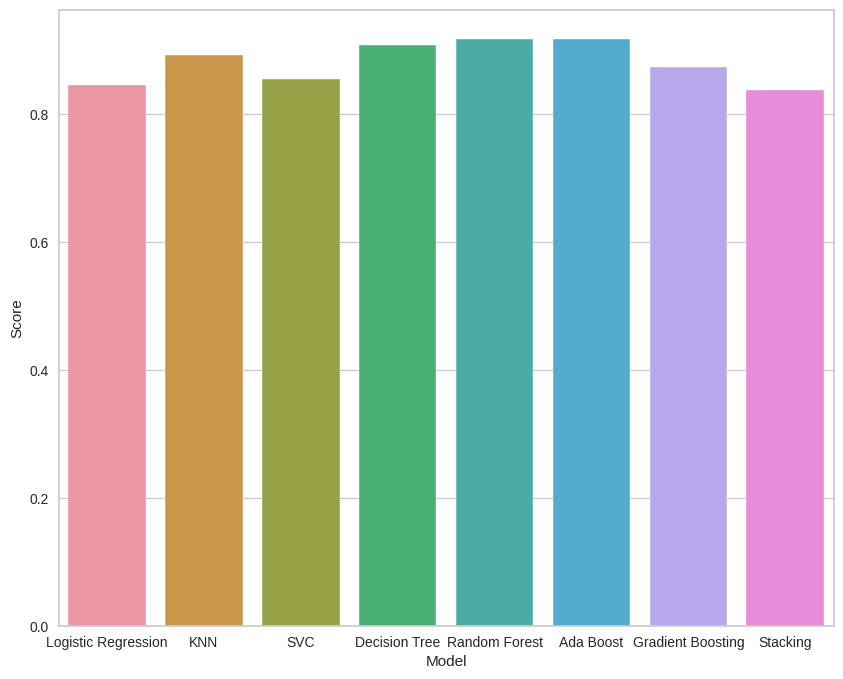

In [ ]:
plt.figure(figsize = (10, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

In [ ]:
'''model_params = {

    "random_forest": {'model': RandomForestClassifier(),
                      'params': {'n_estimators': [200, 250, 100, 150, 300]}
                      }
}
'''


'model_params = {\n\n    "random_forest": {\'model\': RandomForestClassifier(),\n                      \'params\': {\'n_estimators\': [200, 250, 100, 150, 300]}\n                      }\n}\n'

In [ ]:
'''scores = []

for model_name, mp in model_params.items():
  model = mp['model']
  params = mp['params']
  random_search = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=5, cv=3)
  random_search.fit(X_trainc, y_trainc)
  scores.append({
        "model" : model_name,
        'best_score': random_search.best_score_,
        'best_params' : random_search.best_params_})
mod_df = pd.DataFrame(scores,columns = ["model","best_score","best_params"])
mod_df'''

'scores = []\n\nfor model_name, mp in model_params.items():\n  model = mp[\'model\']\n  params = mp[\'params\']\n  random_search = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=5, cv=3)\n  random_search.fit(X_trainc, y_trainc)\n  scores.append({\n        "model" : model_name,\n        \'best_score\': random_search.best_score_,\n        \'best_params\' : random_search.best_params_})\nmod_df = pd.DataFrame(scores,columns = ["model","best_score","best_params"])\nmod_df'

In [ ]:
'''model_params = {
    'decision_tree': {'model': DecisionTreeClassifier(),
            'params' : {
                "criterion" :["gini", "entropy", "log_loss"],
                'splitter': [ 'best'],
                "min_samples_split": [2,4,6],
                'random_state': [36]}
           },
    "AdaBoostDT": {'model' : AdaBoostClassifier(),
                   'params' : {'n_estimators' : [10,50,100,150,200],
                               'learning_rate':[0.1,0.2,0.3,0.4],
                               "algorithm" : ['SAMME', 'SAMME.R']}
                     },
    "AdaBoostRandomForest": {'model' : AdaBoostClassifier(),
                   'params' : {"base_estimator":[RandomForestClassifier()],
                               'n_estimators' : [400,250,300,450,200],
                               'learning_rate':[0.1,0.2,0.3,0.4],
                               "algorithm" : ['SAMME', 'SAMME.R']}
                     },
    'xgboost_classifier' : {'model' : XGBClassifier(),
        'params':{"n_estimators" : [1,30,100,150,200],
                 'learning_rate':[0.1,0.2,0.3,0.4],
                 }
                           }
}'''

'model_params = {\n    \'decision_tree\': {\'model\': DecisionTreeClassifier(),\n            \'params\' : {\n                "criterion" :["gini", "entropy", "log_loss"],\n                \'splitter\': [ \'best\'],\n                "min_samples_split": [2,4,6],\n                \'random_state\': [36]}\n           },\n    "AdaBoostDT": {\'model\' : AdaBoostClassifier(),\n                   \'params\' : {\'n_estimators\' : [10,50,100,150,200],\n                               \'learning_rate\':[0.1,0.2,0.3,0.4],\n                               "algorithm" : [\'SAMME\', \'SAMME.R\']}\n                     },\n    "AdaBoostRandomForest": {\'model\' : AdaBoostClassifier(),\n                   \'params\' : {"base_estimator":[RandomForestClassifier()],\n                               \'n_estimators\' : [400,250,300,450,200],\n                               \'learning_rate\':[0.1,0.2,0.3,0.4],\n                               "algorithm" : [\'SAMME\', \'SAMME.R\']}\n                     },\n    

In [ ]:
'''scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp['params'], cv =10, return_train_score = False)
    clf.fit(Xc, yc)
    scores.append({
        "model" : model_name,
        'best_score': clf.best_score_,
        'best_params' : clf.best_params_})
mod_df1 = pd.DataFrame(scores,columns = ["model","best_score","best_params"])
mod_df1'''

'scores = []\n\nfor model_name, mp in model_params.items():\n    clf = GridSearchCV(mp["model"],mp[\'params\'], cv =10, return_train_score = False)\n    clf.fit(Xc, yc)\n    scores.append({\n        "model" : model_name,\n        \'best_score\': clf.best_score_,\n        \'best_params\' : clf.best_params_})\nmod_df1 = pd.DataFrame(scores,columns = ["model","best_score","best_params"])\nmod_df1'

In [ ]:
'''modeles_df = pd.concat([mod_df,mod_df1]).set_index('model',drop = True)
modeles_df'''

"modeles_df = pd.concat([mod_df,mod_df1]).set_index('model',drop = True)\nmodeles_df"

In [ ]:
'''print('Random Forest Regression')
print("Accuracy in training dataset: ", (model_rf.score(x_train, y_train)*100))
print("Accuracy in testing dataset: ", model_rf.score(x_test, y_test)*100)
print("RMSE value: ", sqrt(mean_squared_error(y_test, y_pred)))'''